In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

Loading health data

In [41]:
data_health=pd.read_csv("C:/Users/hp/Videos/Dynasty/health_insurance.csv")
#for visualisation before preprocessing
data_health_visualisation=data_health

In [42]:
#showing the first 10 rows
data_health.head()

,age,sex,bmi,children,smoker,region,salary,insured
0,19,female,27.900,0,yes,southwest,83039,1
1,18,male,33.770,1,no,southeast,68286,1
2,28,male,33.000,3,no,southeast,18873,0
3,33,male,22.705,0,no,northwest,77377,1
4,32,male,28.880,0,no,northwest,42428,1


Data Preprossessing


In [43]:
#shape of dataframe
data_health.shape

(1338, 8)

In [44]:
#statistical measures
data_health.describe()

,age,bmi,children,salary,insured
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,55159.035874,0.666667
std,14.049960,6.098187,1.205493,26355.547662,0.471581
min,18.000000,15.960000,0.000000,10038.000000,0.000000
25%,27.000000,26.296250,0.000000,32053.000000,0.000000
50%,39.000000,30.400000,1.000000,56294.000000,1.000000
75%,51.000000,34.693750,2.000000,77442.250000,1.000000
max,64.000000,53.130000,5.000000,99946.000000,1.000000


In [45]:
#as we can see there is inconsistence in range of values because of means showed.Data normalisation will make some statistical analysis easier
#salary will impact more on our analysis because it as a large mean as compared to age,bmi and children
#Data normalisation 
from sklearn import preprocessing
def normalise(x):
    min_max_scaler=preprocessing.MinMaxScaler().fit_transform(x)
    return min_max_scaler
#data_health["age"]=normalise(data_health[["age"]])
#data_health["bmi"]=normalise(data_health[["bmi"]])
#data_health["salary"]=normalise(data_health[["salary"]])

In [46]:
data_health.head()
#we can see that our data has been normalised

,age,sex,bmi,children,smoker,region,salary,insured
0,19,female,27.900,0,yes,southwest,83039,1
1,18,male,33.770,1,no,southeast,68286,1
2,28,male,33.000,3,no,southeast,18873,0
3,33,male,22.705,0,no,northwest,77377,1
4,32,male,28.880,0,no,northwest,42428,1


In [47]:
#checking contesnt in smoker and region
data_health["sex"].unique(),data_health["smoker"].unique(),data_health["region"].unique()

(array(['female', 'male'], dtype=object),
 array(['yes', 'no'], dtype=object),
 array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object))

In [48]:
#label encoding for smoker and region
data_health.replace({"sex":{'female':0,'male':1}},inplace=True)
data_health.replace({"smoker":{'no':0,'yes':1}},inplace=True)
data_health.replace({"region":{'southwest':0,'southeast':1,'northwest':2,'northeast':3}},inplace=True)

In [49]:
#see the encoded data
data_health.head()

,age,sex,bmi,children,smoker,region,salary,insured
0,19,0,27.900,0,1,0,83039,1
1,18,1,33.770,1,0,1,68286,1
2,28,1,33.000,3,0,1,18873,0
3,33,1,22.705,0,0,2,77377,1
4,32,1,28.880,0,0,2,42428,1


Data Visualisation

<AxesSubplot:xlabel='region', ylabel='count'>

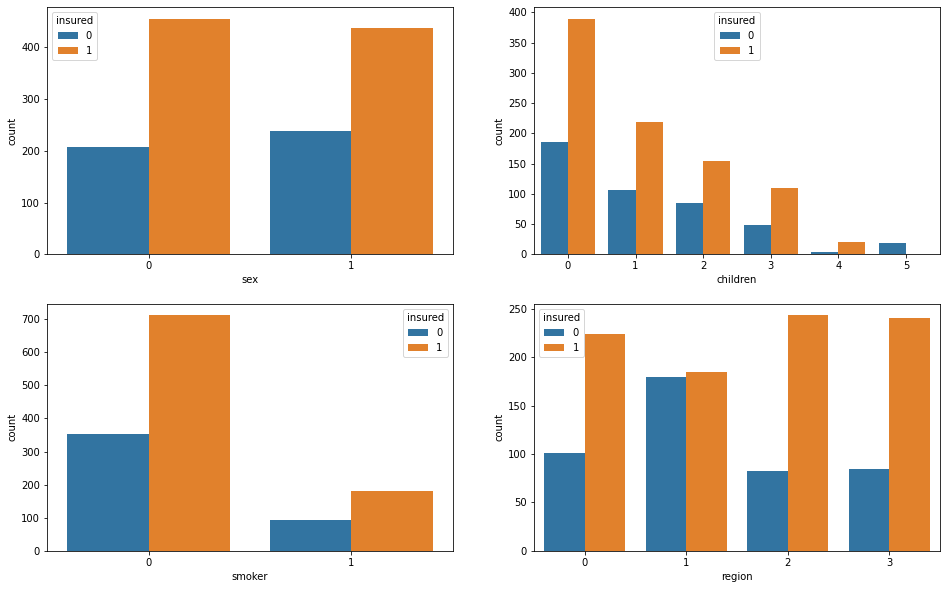

In [50]:
#Visualizing the relation between Target and Feature variables
import matplotlib.pyplot as plt

fig,ax=plt.subplots(2,2,figsize=(16,10))
sns.countplot(x="sex",hue="insured",data=data_health_visualisation,ax=ax[0][0])
sns.countplot(x="children",hue="insured",data=data_health_visualisation,ax=ax[0][1])
sns.countplot(x="smoker",hue="insured",data=data_health_visualisation,ax=ax[1][0])
sns.countplot(x="region",hue="insured",data=data_health_visualisation,ax=ax[1][1])

Pre-Modelling

In [51]:
#Check if dataset is numerical or float for modelling
for i in data_health:
    print(data_health[i].name," : ",data_health[i].dtype)

age  :  int64
sex  :  int64
bmi  :  float64
children  :  int64
smoker  :  int64
region  :  int64
salary  :  int64
insured  :  int64


In [69]:
#Data seperation into Feature and Target 
X=data_health[["age","sex","bmi","children","smoker","region","salary"]].values
Y=data_health["insured"].values

In [73]:
#Values for Feature value
from sklearn import preprocessing
def normalise(x):
    min_max_scaler=preprocessing.MinMaxScaler().fit_transform(x)
    return min_max_scaler
X=normalise(X)
print(X)

[[0.02173913 0.         0.3212268  ... 1.         0.         0.81195222]
 [0.         1.         0.47914985 ... 0.         0.33333333 0.64786226]
 [0.2173913  1.         0.45843422 ... 0.         0.33333333 0.09826712]
 ...
 [0.         0.         0.56201238 ... 0.         0.33333333 0.52238955]
 [0.06521739 0.         0.26472962 ... 0.         0.         0.92413356]
 [0.93478261 0.         0.35270379 ... 1.         0.66666667 0.95963652]]


In [74]:
#Values for Target variable
print(Y)

[1 1 0 ... 0 1 1]


Train Test Split

In [75]:
#Split the data into train and test data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.2,random_state=2)

In [76]:
#Shape of X train,X test,Y train,Y test
print(X.shape,X_train.shape,X_test.shape)


(1338, 7) (1070, 7) (268, 7)


Model Building and Training Model for Decision Tree

In [77]:
#Fitting decision classifier to the model
from sklearn.tree import DecisionTreeClassifier  
data_health_classifier= DecisionTreeClassifier(criterion='entropy',random_state=0)  
data_health_classifier.fit(X_train, Y_train)  

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [78]:
#Predicting the test set result  
Y_pred=data_health_classifier.predict(X_test)  

Model Evaluation Decision Tree

In [106]:
#Accuracy of the Decision Tree
from sklearn import metrics
print('The accuracy of Decision Trees is: ', metrics.accuracy_score(Y_pred, Y_test))

The accuracy of Decision Trees is:  1.0


Model Building and Training for KNN

In [107]:
#Fitting the KNN
from sklearn.neighbors import KNeighborsClassifier  
data_health_knn=KNeighborsClassifier(n_neighbors=9)
data_health_knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=9)

In [108]:
#Predicitng on thr test set results
Y_pred_knn=data_health_knn.predict(X_test)

Model Evaluation KNN

In [109]:
#Accuracy of the KNN
from sklearn import metrics
print('The accuracy of KNN is: ', metrics.accuracy_score(Y_pred_knn, Y_test))

The accuracy of KNN is:  0.8283582089552238
